In [1973]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import gaussian_kde
import plotly.colors
from plotly.colors import qualitative
from pandas.tseries.offsets import BDay
#import plotly.io as pio

In [1974]:
df = pd.read_csv('final_asset_classes.csv', index_col=0, parse_dates=True)

In [1975]:
df.head()

REEL        PE  MSCIWORLD        IG       GOV        HY
Date                                                                   
2005-10-10  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000
2005-10-11  1.003231  1.006833   1.004578  0.998658  0.998084  0.995925
2005-10-12  0.999670  0.997110   0.996675  0.996056  0.996517  0.991573
2005-10-13  0.981077  0.986449   0.997260  0.993734  0.993465  0.988179
2005-10-14  0.973370  0.987997   0.994278  0.993174  0.993525  0.989778

In [1976]:
#change name of columns for better readability

df.columns = ['Real Estate', 'Private Equity', 'Equity', 'IG Corporate Bonds', 'Government Bonds', 'HY Corporate Bonds']

#change order of columns for better readability

df = df[['Equity', 'Private Equity', 'Real Estate', 'IG Corporate Bonds', 'HY Corporate Bonds', 'Government Bonds']]

In [1977]:
df.head()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
Date                                                                    
2005-10-10  1.000000        1.000000     1.000000            1.000000   
2005-10-11  1.004578        1.006833     1.003231            0.998658   
2005-10-12  0.996675        0.997110     0.999670            0.996056   
2005-10-13  0.997260        0.986449     0.981077            0.993734   
2005-10-14  0.994278        0.987997     0.973370            0.993174   

            HY Corporate Bonds  Government Bonds  
Date                                              
2005-10-10            1.000000          1.000000  
2005-10-11            0.995925          0.998084  
2005-10-12            0.991573          0.996517  
2005-10-13            0.988179          0.993465  
2005-10-14            0.989778          0.993525

## Drawing the assets

In [1978]:
g10_colors = qualitative.G10

colors = g10_colors * (len(df.columns) // len(g10_colors) + 1)

asset_color_mapping = {column: colors[i] for i, column in enumerate(df.columns)}

for asset, color in asset_color_mapping.items():
    print(f"Asset Class: {asset}, Color: {color}")

fig = go.Figure()

for i, column in enumerate(df.columns):
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column,
        line=dict(color=colors[i], width=1.4)
    ))

fig.update_layout(
    title=dict(
        font=dict(size=24, family="Times New Roman", color="black")  
    ),
    xaxis=dict(
        title="Date", 
        title_font=dict(size=26, family="Times New Roman", color="black"),
        tickfont=dict(size=26, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    yaxis=dict(
        title="Normalized Price", 
        title_font=dict(size=28, family="Times New Roman", color="black"),
        tickfont=dict(size=28, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    legend=dict(
        title="", 
        font=dict(size=33, family="Times New Roman"),
        orientation="h", 
        yanchor="bottom", 
        y=1.02
    ),
    font=dict(
        family="Times New Roman", 
        size=20, 
        color="black"
    ),
    margin=dict(l=50, r=30, t=80, b=50),  
    plot_bgcolor="white",  
    width=1600,  
    height=900   
)

fig.show()

default_colors = plotly.colors.DEFAULT_PLOTLY_COLORS

trace_colors = []

for i, trace in enumerate(fig.data):
    color = trace.line.color  
    if not color:  
        color = default_colors[i % len(default_colors)]
    trace_colors.append((trace.name, color))

for name, color in trace_colors:
    print(f"Asset: {name}, Color: {color}")


Asset Class: Equity, Color: #3366CC
Asset Class: Private Equity, Color: #DC3912
Asset Class: Real Estate, Color: #FF9900
Asset Class: IG Corporate Bonds, Color: #109618
Asset Class: HY Corporate Bonds, Color: #990099
Asset Class: Government Bonds, Color: #0099C6


Asset: Equity, Color: #3366CC
Asset: Private Equity, Color: #DC3912
Asset: Real Estate, Color: #FF9900
Asset: IG Corporate Bonds, Color: #109618
Asset: HY Corporate Bonds, Color: #990099
Asset: Government Bonds, Color: #0099C6


Todo: 
- Remove Real estate jump in 06

## EONIA rate plot
 

In [1979]:
eonia_daily = pd.read_csv('final_eonia/eonia_rate.csv', index_col=0, parse_dates=True)

In [1980]:
eonia_daily.head()

Rate
Date                
2024-11-14  0.000087
2024-11-13  0.000087
2024-11-12  0.000087
2024-11-11  0.000087
2024-11-08  0.000087

In [1981]:
eonia_daily = eonia_daily.loc['2005-10-10':]

In [1982]:
# rename the column from 'Rate' to 'EONIA Rate'
eonia_daily.rename(columns={'Rate': 'EONIA Rate Daily'}, inplace=True)

In [1983]:
# make it a yearly rate again (make rates great again)

eonia_yearly = eonia_daily.copy()
eonia_yearly.rename(columns={'EONIA Rate Daily': 'EONIA Rate Yearly'}, inplace=True)

eonia_yearly['EONIA Rate Yearly'] = eonia_yearly['EONIA Rate Yearly'] * 100 * 365

In [1984]:
eonia_yearly.head()

EONIA Rate Yearly
Date                         
2024-11-14              3.165
2024-11-13              3.164
2024-11-12              3.163
2024-11-11              3.162
2024-11-08              3.163

In [1985]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=eonia_yearly.index, y=eonia_yearly['EONIA Rate Yearly'],
    mode='lines',
    name='EONIA Rate',
    line=dict(width=1.4, color=g10_colors[6])  # EONIA color set to G10[6]
))

fig.add_shape(
    type="line",
    x0=min(eonia_yearly.index),  
    x1=max(eonia_yearly.index),  
    y0=0, y1=0,  
    line=dict(color="black", width=1.5, dash="dash"),
    name="Zero Rate Line"
)

fig.update_layout(
    title=dict(
        font=dict(size=24, family="Times New Roman", color="black")
    ),
    xaxis=dict(
        title="Date", 
        title_font=dict(size=26, family="Times New Roman", color="black"),
        tickfont=dict(size=26, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    yaxis=dict(
        title="EONIA Rate (Annualized %)", 
        title_font=dict(size=28, family="Times New Roman", color="black"),
        tickfont=dict(size=28, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    legend=dict(
        title="", 
        font=dict(size=33, family="Times New Roman"),
        orientation="h", 
        yanchor="bottom", 
        y=1.02
    ),
    font=dict(
        family="Times New Roman", 
        size=20, 
        color="black"
    ),
    margin=dict(l=50, r=30, t=80, b=50),  
    plot_bgcolor="white",  
    width=1600,  
    height=900   
)

fig.show()


## Assuming continous reinvestment in EONIA

In [1986]:
eonia_daily.head()

EONIA Rate Daily
Date                        
2024-11-14          0.000087
2024-11-13          0.000087
2024-11-12          0.000087
2024-11-11          0.000087
2024-11-08          0.000087

In [1987]:
eonia_daily = eonia_daily.iloc[::-1]
eonia_daily.head()

EONIA Rate Daily
Date                        
2005-10-10          0.000054
2005-10-11          0.000053
2005-10-12          0.000057
2005-10-13          0.000057
2005-10-14          0.000057

In [1988]:
# calculate the 1-day return of the EONIA rate over the entire period assuming continuous reinvestment

eonia_daily['Price Development'] = 1  # Start with 1 on the first day

# Calculate the price development iteratively
for i in range(1, len(eonia_daily)):
    eonia_daily.iloc[i, eonia_daily.columns.get_loc('Price Development')] = (
        eonia_daily.iloc[i - 1, eonia_daily.columns.get_loc('Price Development')] *
        (1 + eonia_daily.iloc[i - 1, eonia_daily.columns.get_loc('EONIA Rate Daily')])
    )

eonia_daily.head()

/var/folders/4j/dxkybcjx57g2_q7pvt8nkd040000gn/T/ipykernel_76244/286482558.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.000053698630137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



EONIA Rate Daily  Price Development
Date                                           
2005-10-10          0.000054           1.000000
2005-10-11          0.000053           1.000054
2005-10-12          0.000057           1.000107
2005-10-13          0.000057           1.000164
2005-10-14          0.000057           1.000221

In [1989]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=eonia_daily.index, 
    y=eonia_daily['Price Development'],
    mode='lines',
    name='EONIA Price Development',
    line=dict(width=1.4, color=g10_colors[6])  # EONIA color set to G10[6]
))

fig.update_layout(
    title=dict(
        font=dict(size=24, family="Times New Roman", color="black")
    ),
    xaxis=dict(
        title="Date", 
        title_font=dict(size=26, family="Times New Roman", color="black"),
        tickfont=dict(size=26, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    yaxis=dict(
        title="Price Development", 
        title_font=dict(size=28, family="Times New Roman", color="black"),
        tickfont=dict(size=28, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    legend=dict(
        title="", 
        font=dict(size=33, family="Times New Roman"),
        orientation="h", 
        yanchor="bottom", 
        y=1.02
    ),
    font=dict(
        family="Times New Roman", 
        size=20, 
        color="black"
    ),
    margin=dict(l=50, r=30, t=80, b=50),  
    plot_bgcolor="white",  
    width=1600,  
    height=900   
)

fig.show()


In [1990]:
days_per_year = eonia_daily.index.year.value_counts().sort_index()

# Convert the result to a DataFrame for better visualization if needed
days_per_year = days_per_year.rename_axis('Year').reset_index(name='Number of Recorded Days')

print(days_per_year)

    Year  Number of Recorded Days
0   2005                       59
1   2006                      255
2   2007                      255
3   2008                      256
4   2009                      256
5   2010                      258
6   2011                      257
7   2012                      256
8   2013                      255
9   2014                      255
10  2015                      256
11  2016                      257
12  2017                      255
13  2018                      255
14  2019                      255
15  2020                      257
16  2021                      258
17  2022                      257
18  2023                      255
19  2024                      225


### Making daily compunded right

In [1991]:
eonia_yearly.head()

EONIA Rate Yearly
Date                         
2024-11-14              3.165
2024-11-13              3.164
2024-11-12              3.163
2024-11-11              3.162
2024-11-08              3.163

In [1992]:
def calculate_compounding_factor(df):

    # Convert 'EONIA Rate' to a decimal form
    df['EONIA Rate Yearly'] = df['EONIA Rate Yearly'] / 100  # Convert percentage to decimal

    # Assign the number of calendar days (n_i) based on weekends
    df['n_i'] = 1  # Default to 1 day
    df.loc[df.index.weekday == 0, 'n_i'] = 3  # Assign 3 days for Mondays (weekend accrual)

    # Define the number of days in a year according to European money market convention
    days_in_year = 360

    df['Compounding Factor'] = 1 + (df['EONIA Rate Yearly'] * df['n_i'] / days_in_year)

    return df

eonia_yearly = calculate_compounding_factor(eonia_yearly)

In [1993]:
eonia_yearly.head(10)

EONIA Rate Yearly  n_i  Compounding Factor
Date                                                  
2024-11-14            0.03165    1            1.000088
2024-11-13            0.03164    1            1.000088
2024-11-12            0.03163    1            1.000088
2024-11-11            0.03162    3            1.000263
2024-11-08            0.03163    1            1.000088
2024-11-07            0.03163    1            1.000088
2024-11-06            0.03162    1            1.000088
2024-11-05            0.03163    1            1.000088
2024-11-04            0.03163    3            1.000264
2024-11-01            0.03163    1            1.000088

In [1994]:
eonia_yearly = eonia_yearly.iloc[::-1]
initial_investment = 1.0

eonia_yearly['Investment Value'] = initial_investment * eonia_yearly['Compounding Factor'].cumprod()

eonia_yearly.head()

EONIA Rate Yearly  n_i  Compounding Factor  Investment Value
Date                                                                    
2005-10-10             0.0196    3            1.000163          1.000163
2005-10-11             0.0193    1            1.000054          1.000217
2005-10-12             0.0208    1            1.000058          1.000275
2005-10-13             0.0208    1            1.000058          1.000333
2005-10-14             0.0208    1            1.000058          1.000390

In [1995]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=eonia_yearly.index, 
    y=eonia_yearly['Investment Value'],
    mode='lines',
    name='EONIA Price Development',
    line=dict(width=1.4, color=g10_colors[6])  # EONIA color set to G10[6]
))

fig.update_layout(
    title=dict(
        font=dict(size=24, family="Times New Roman", color="black")
    ),
    xaxis=dict(
        title="Date", 
        title_font=dict(size=26, family="Times New Roman", color="black"),
        tickfont=dict(size=26, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    yaxis=dict(
        title="Price Development", 
        title_font=dict(size=28, family="Times New Roman", color="black"),
        tickfont=dict(size=28, family="Times New Roman"),
        showline=True,  
        linecolor="black",  
    ),
    legend=dict(
        title="", 
        font=dict(size=33, family="Times New Roman"),
        orientation="h", 
        yanchor="bottom", 
        y=1.02
    ),
    font=dict(
        family="Times New Roman", 
        size=20, 
        color="black"
    ),
    margin=dict(l=50, r=30, t=80, b=50),  
    plot_bgcolor="white",  
    width=1600,  
    height=900   
)

fig.show()

## Now Plotting Dsitrbutions For Daily Returns

Each asset done separately

In [1996]:
df.describe()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
count  4890.000000     4874.000000  4870.000000         4810.000000   
mean      2.042217        1.717511     1.411261            1.530295   
std       1.104173        1.054605     0.461314            0.337475   
min       0.590273        0.243334     0.392264            0.953265   
25%       1.103804        0.948367     1.011310            1.249997   
50%       1.811993        1.398014     1.485446            1.581772   
75%       2.686007        2.071806     1.750996            1.794127   
max       5.194840        5.221368     2.416112            2.081608   

       HY Corporate Bonds  Government Bonds  
count         4810.000000       4879.000000  
mean             2.079859          1.411573  
std              0.701273          0.266887  
min              0.761075          0.965870  
25%              1.462401          1.165808  
50%              2.114814          1.477120  
75%              2.711475          1.620430  
max              3.323006          1.842570

In [1997]:
#daily_returns = df.pct_change(fill_method=None).dropna() 

#df = df.fillna(method='ffill').fillna(method='bfill') # forward or backward filling 

df = df.apply(lambda x: x.interpolate() if x.isna().sum() > 0 else x)


daily_returns = df.pct_change().dropna()

In [1998]:
# combine daily_returns and eonia_daily

daily_returns = daily_returns.join(eonia_daily, how='inner')

In [1999]:
daily_returns = daily_returns.join(eonia_yearly, how='inner')

In [2000]:
daily_returns.head()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
Date                                                                    
2005-10-11  0.004578        0.006833     0.003231           -0.001342   
2005-10-12 -0.007867       -0.009657    -0.003550           -0.002606   
2005-10-13  0.000588       -0.010692    -0.018599           -0.002331   
2005-10-14 -0.002991        0.001569    -0.007856           -0.000564   
2005-10-17  0.003290        0.000492    -0.003613            0.000458   

            HY Corporate Bonds  Government Bonds  EONIA Rate Daily  \
Date                                                                 
2005-10-11           -0.004075         -0.001916          0.000053   
2005-10-12           -0.004370         -0.001570          0.000057   
2005-10-13           -0.003423         -0.003062          0.000057   
2005-10-14            0.001618          0.000060          0.000057   
2005-10-17            0.005447         -0.000227          0.000057   

            Price Development  EONIA Rate Yearly  n_i  Compounding Factor  \
Date                                                                        
2005-10-11           1.000054             0.0193    1            1.000054   
2005-10-12           1.000107             0.0208    1            1.000058   
2005-10-13           1.000164             0.0208    1            1.000058   
2005-10-14           1.000221             0.0208    1            1.000058   
2005-10-17           1.000278             0.0208    3            1.000173   

            Investment Value  
Date                          
2005-10-11          1.000217  
2005-10-12          1.000275  
2005-10-13          1.000333  
2005-10-14          1.000390  
2005-10-17          1.000564

In [2001]:
daily_returns.describe()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
count  4890.000000     4890.000000  4890.000000         4890.000000   
mean      0.000387        0.000423     0.000234            0.000142   
std       0.010024        0.013339     0.015848            0.002465   
min      -0.100676       -0.128207    -0.330296           -0.031052   
25%      -0.003941       -0.005009    -0.006015           -0.001129   
50%       0.000806        0.001007     0.000435            0.000251   
75%       0.005287        0.006733     0.006893            0.001542   
max       0.088746        0.127987     0.507261            0.016284   

       HY Corporate Bonds  Government Bonds  EONIA Rate Daily  \
count         4890.000000       4890.000000       4890.000000   
mean             0.000250          0.000095          0.000025   
std              0.003115          0.002929          0.000044   
min             -0.047106         -0.016023         -0.000016   
25%             -0.000596         -0.001418         -0.000010   
50%              0.000432          0.000170          0.000003   
75%              0.001277          0.001592          0.000063   
max              0.028941          0.020704          0.000126   

       Price Development  EONIA Rate Yearly          n_i  Compounding Factor  \
count        4890.000000        4890.000000  4890.000000         4890.000000   
mean            1.082703           0.009021     1.394274            1.000035   
std             0.024635           0.016237     0.795755            0.000075   
min             1.000054          -0.005930     1.000000            0.999951   
25%             1.080492          -0.003580     1.000000            0.999990   
50%             1.089509           0.001120     1.000000            1.000005   
75%             1.097453           0.023022     1.000000            1.000067   
max             1.128416           0.046010     3.000000            1.000372   

       Investment Value  
count       4890.000000  
mean           1.118663  
std            0.035551  
min            1.000217  
25%            1.115263  
50%            1.128456  
75%            1.140044  
max            1.185357

### Colours: 

Equity, rgb(31, 119, 180) 

Private Equity, rgb(255, 127, 14) 

Real Estate, rgb(44, 160, 44) 

IG Corporate Bonds, rgb(214, 39, 40) 

HY Corporate Bonds, rgb(148, 103, 189) 

Government Bonds, rgb(140, 86, 75) 

EONIA rate: rgb(227, 119, 194)


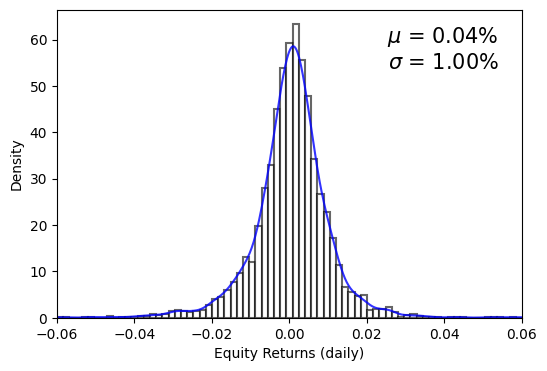

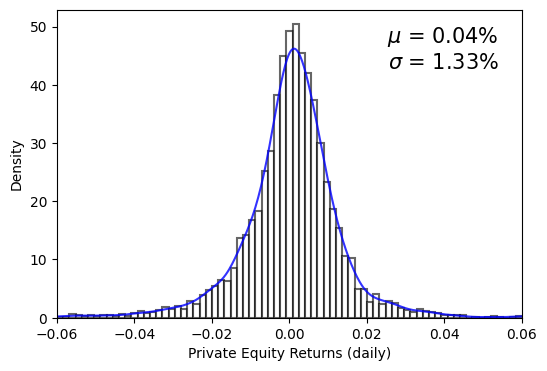

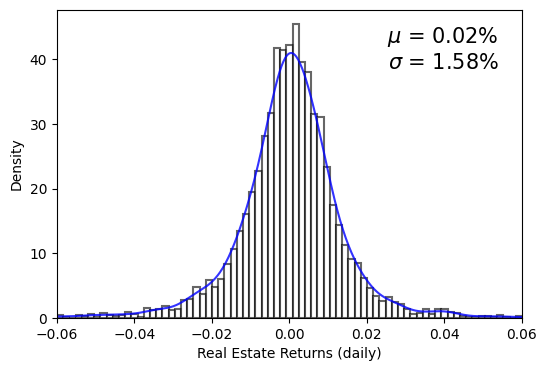

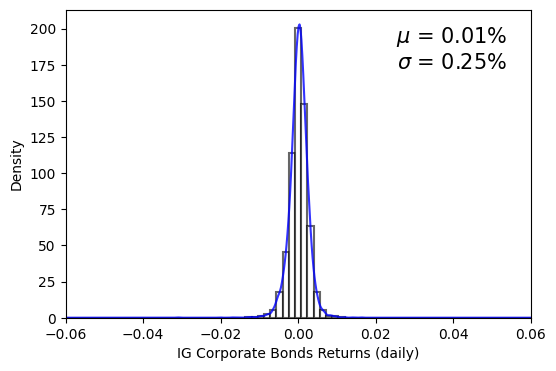

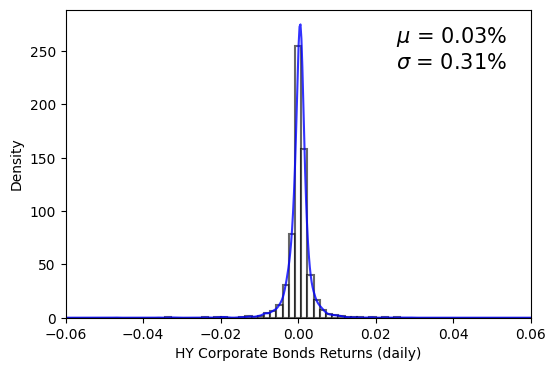

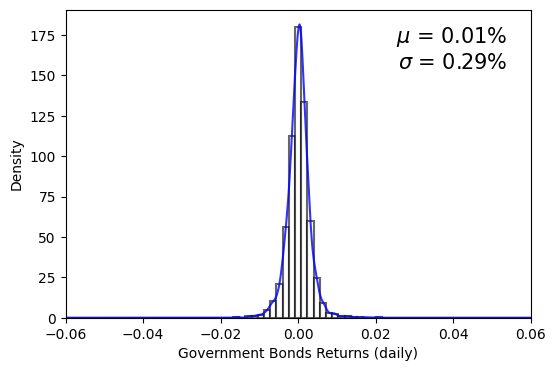

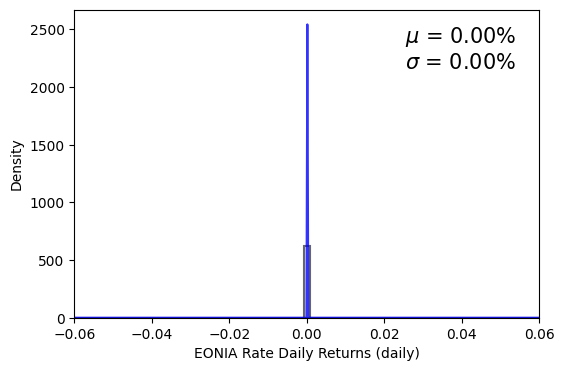

/Users/simenstang/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



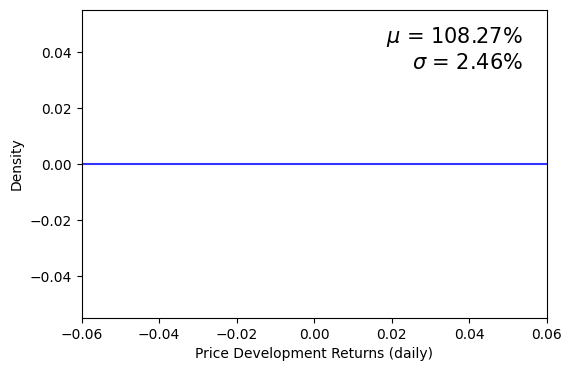

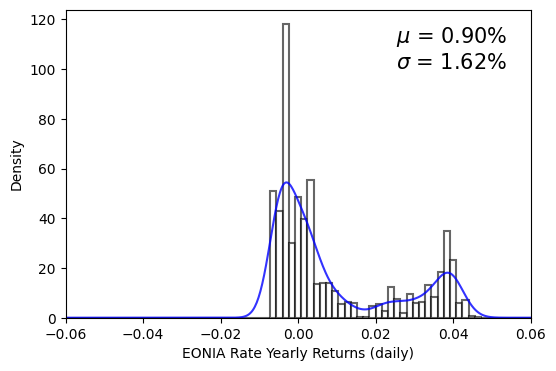

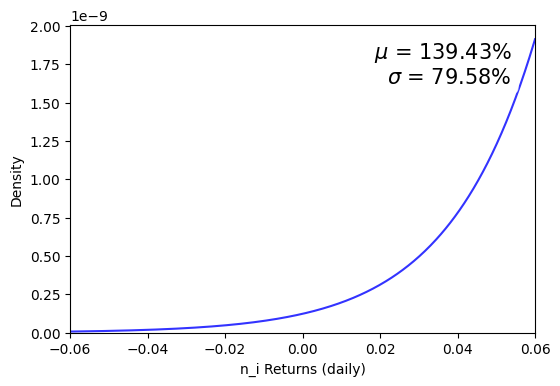

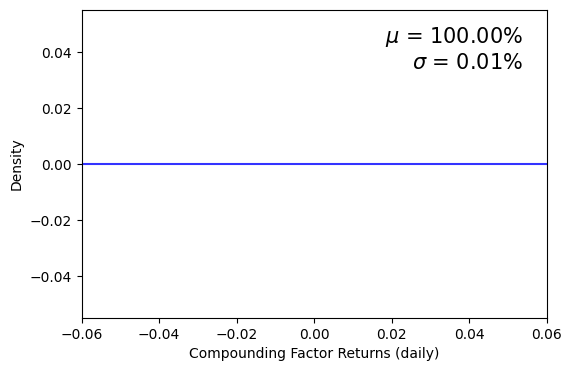

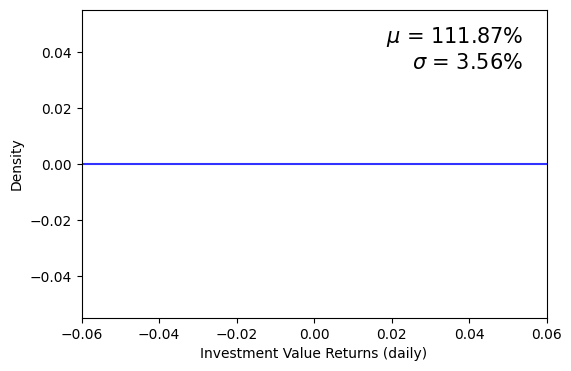

In [2002]:
x_min = -0.06
x_max = 0.06
num_bins = 75
bin_edges = np.linspace(x_min, x_max, num_bins + 1)

for column in daily_returns.columns:
    data = daily_returns[column].dropna()
    
    fig, ax = plt.subplots(figsize=(6, 4))  
    
    ax.hist(
        data,
        bins=bin_edges,
        color='white',
        alpha=0.6,
        density=True,
        edgecolor='black',
        linewidth=1.5
    )
    
    # Add KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(x_min, x_max, 500)
    ax.plot(x_vals, kde(x_vals), color='blue', linewidth=1.5, label='KDE', alpha=0.8) #linestyle='--'

    
    mu = data.mean() * 100
    sigma = data.std() * 100
    
    ax.text(
        0.95, 0.95,  
        f"$\mu$ = {mu:.2f}%\n$\sigma$ = {sigma:.2f}%",
        transform=ax.transAxes,
        fontsize=15,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white", alpha=0.7)
    )
    
    #ax.set_title(f'Distribution of Daily Returns for {column}')
    ax.set_xlabel(f'{column} Returns (daily)') # remove for final edit in overleaf
    ax.set_ylabel('Density')
    ax.grid(False)
    ax.set_xlim(x_min, x_max)
    
    plt.show()  


ToDo:
- Make the colour of the KDE the same as in the performance plot for each class, improving readability. 

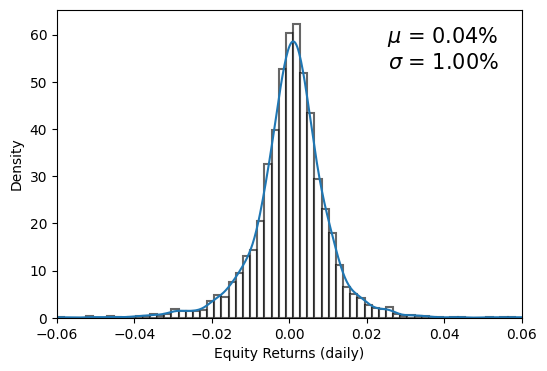

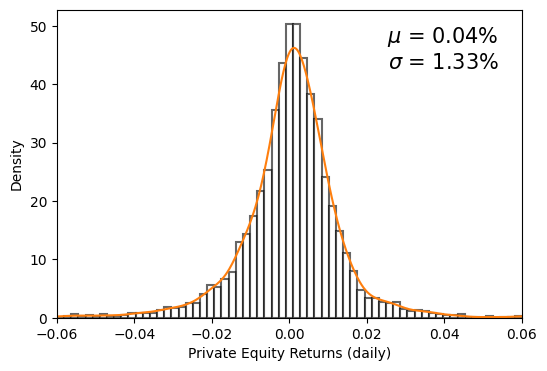

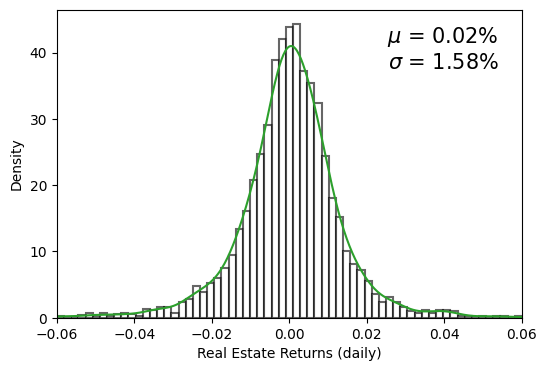

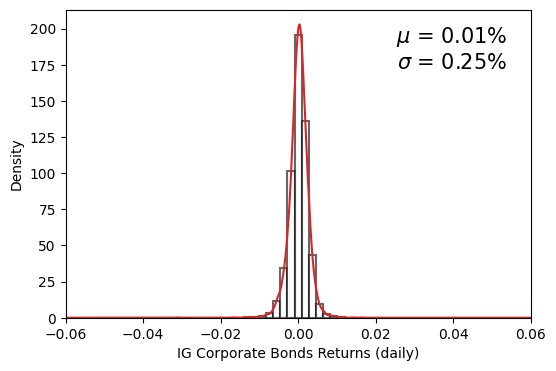

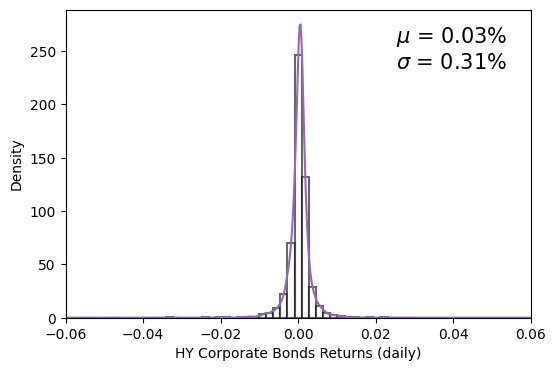

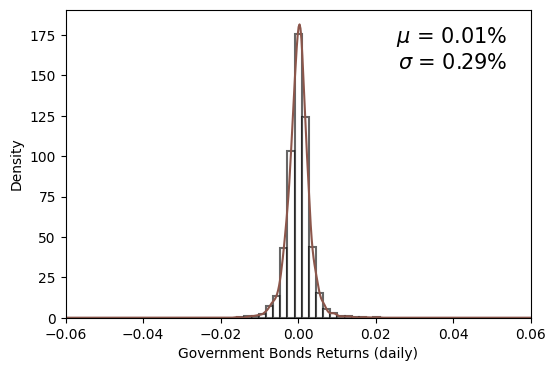

KeyError: 'EONIA Rate Daily'

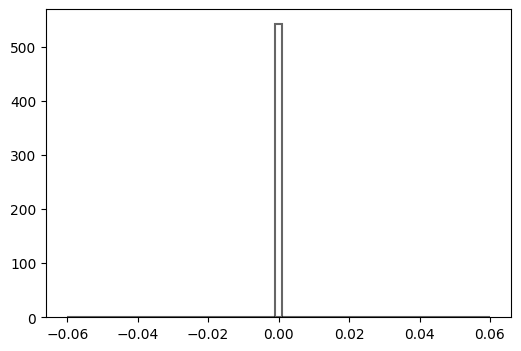

In [2003]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the RGB colors for each asset
asset_colors = {
    "Equity": (31/255, 119/255, 180/255),
    "Private Equity": (255/255, 127/255, 14/255),
    "Real Estate": (44/255, 160/255, 44/255),
    "IG Corporate Bonds": (214/255, 39/255, 40/255),
    "HY Corporate Bonds": (148/255, 103/255, 189/255),
    "Government Bonds": (140/255, 86/255, 75/255),
    "EONIA Rate": (227/255, 119/255, 194/255),
}

x_min = -0.06
x_max = 0.06
num_bins = 65
bin_edges = np.linspace(x_min, x_max, num_bins + 1)

for column in daily_returns.columns:
    data = daily_returns[column].dropna()
    
    fig, ax = plt.subplots(figsize=(6, 4))  
    
    ax.hist(
        data,
        bins=bin_edges,
        color='white',
        alpha=0.6,
        density=True,
        edgecolor='black',
        linewidth=1.5
    )
    
    # Add KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(x_min, x_max, 500)
    ax.plot(
        x_vals,
        kde(x_vals),
        color=asset_colors[column],  # Use the specific color for the asset
        linewidth=1.5,
        label='KDE',
        alpha=1
    )

    mu = data.mean() * 100
    sigma = data.std() * 100
    
    ax.text(
        0.95, 0.95,  
        f"$\mu$ = {mu:.2f}%\n$\sigma$ = {sigma:.2f}%",
        transform=ax.transAxes,
        fontsize=15,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white", alpha=0.7)
    )
    
    ax.set_xlabel(f'{column} Returns (daily)')  # Label for the x-axis
    ax.set_ylabel('Density')
    ax.grid(False)
    ax.set_xlim(x_min, x_max)
    
    plt.show()


In [ ]:
asset_colors = {
    "Equity": "rgb(31, 119, 180)",
    "Private Equity": "rgb(255, 127, 14)",
    "Real Estate": "rgb(44, 160, 44)",
    "IG Corporate Bonds": "rgb(214, 39, 40)",
    "HY Corporate Bonds": "rgb(148, 103, 189)",
    "Government Bonds": "rgb(140, 86, 75)",
    "EONIA Rate": "rgb(227, 119, 194)",
}

x_min = -0.06
x_max = 0.06
num_bins = 65
bin_edges = np.linspace(x_min, x_max, num_bins + 1)

for column in daily_returns.columns:
    data = daily_returns[column].dropna()
    
    # KDE calculation
    kde = gaussian_kde(data)
    x_vals = np.linspace(x_min, x_max, 500)
    kde_vals = kde(x_vals)
    
    # Create the figure
    fig = go.Figure()
    
    # Add histogram
    fig.add_trace(
        go.Histogram(
            x=data,
            xbins=dict(start=x_min, end=x_max, size=(x_max - x_min) / num_bins),
            histnorm='probability density',
            marker=dict(
                color='rgba(255, 255, 255, 0.6)',
                line=dict(color='black', width=1.5)
            ),
            name='Histogram'
        )
    )
    
    # Add KDE line
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=kde_vals,
            mode='lines',
            line=dict(color=asset_colors[column], width=1.5),
            name='KDE',
            opacity=1  # Match matplotlib alpha
        )
    )
    
    # Update layout to mimic Matplotlib style
    fig.update_layout(
        width=600,  # Match size in pixels
        height=400,
        font=dict(size=14),  # Match label and text sizes
        xaxis=dict(
            title=f"{column} Returns (daily)",
            range=[x_min, x_max],
            showgrid=False,
            zeroline=False,
            linewidth=1,
            linecolor='black',
        ),
        yaxis=dict(
            title="Density",
            showgrid=False,
            zeroline=False,
            linewidth=1,
            linecolor='black',
        ),
        margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins for better spacing
        paper_bgcolor='white',  # Background to match Matplotlib
        plot_bgcolor='white',
        showlegend=False,
    )
    
    # Add text annotation for mean and standard deviation
    mu = data.mean() * 100
    sigma = data.std() * 100
    annotation_text = f"$$\\mu$$ = {mu:.2f}%<br>$$\\sigma$$ = {sigma:.2f}%"
    fig.add_annotation(
        x=0.85 * x_max,
        y=max(kde_vals) * 0.9,
        text=annotation_text,
        showarrow=False,
        font=dict(size=12),
        align='right',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='white',
    )
    
    # Show the figure
    fig.show()

In [ ]:
fig = go.Figure()

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(go.Histogram(
        x=daily_returns[column].dropna(),
        xbins=dict(
            start=x_min,
            end=x_max,
            size=(x_max - x_min) / num_bins  # Fixed bin size for consistency
        ),
        marker_color=px.colors.qualitative.Plotly[i],
        opacity=0.5,
        name=column,
        histnorm='probability density',
        nbinsx=100
    ))

# Update layout for better presentation
fig.update_layout(
    title="Distribution of Daily Returns for All Assets",
    xaxis_title="Daily Return",
    yaxis_title="Density",
    barmode='overlay',  # Overlay all histograms
    xaxis=dict(range=[x_min, x_max]),
    legend_title="Assets"
)

fig.show()

## Correlation Matrix

In [ ]:
correlation_matrix = daily_returns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.where(~mask)

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    colorbar_title="Correlation",
    zmin=-1, zmax=1,
    text=np.round(correlation_matrix_masked.values, 2),
    hovertemplate="%{text}",
))
fig.update_layout(
    title="Lower Triangular Correlation Matrix of Daily Returns",
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange="reversed"),
    #template="plotly_dark"
)

fig.show()

### Descriptive stats


In [ ]:
summary_stats = pd.DataFrame({
    "Min": daily_returns.min(),
    "Max": daily_returns.max(),
    "Mean": daily_returns.mean(),
    "S.D.": daily_returns.std(),
    "Skewness": daily_returns.skew(),
    "Kurtosis": daily_returns.kurtosis()
})

# Round the results for easier reading
summary_stats = summary_stats.round(4)

# Display the results
summary_stats

Min     Max    Mean    S.D.  Skewness  Kurtosis
Equity             -0.1007  0.0887  0.0004  0.0100   -0.4718   10.4606
Private Equity     -0.1282  0.1280  0.0004  0.0133   -0.4900   10.0983
Real Estate        -0.3303  0.5073  0.0002  0.0158    4.6793  254.6917
IG Corporate Bonds -0.0311  0.0163  0.0001  0.0025   -0.8037    9.1402
HY Corporate Bonds -0.0471  0.0289  0.0003  0.0031   -1.9887   33.7415
Government Bonds   -0.0160  0.0207  0.0001  0.0029    0.1536    4.3656
EONIA Rate         -0.0000  0.0001  0.0000  0.0000    0.9699   -0.6676